# 概要
- 各データの期間について
- 予測対象となるauctionについて
- テストデータについて
- どのオークションがシステム的に候補から外れるか

In [120]:
from os.path import dirname
import os
import datetime
from dateutil.relativedelta import relativedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [121]:
%load_ext autoreload
%autoreload 2
import brandear_est as be

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
INPUT_DIR = os.path.join(os.getcwd(), "../../data/input/")
IMD_DIR = os.path.join(os.getcwd(), "../../data/intermediate/")

## 各データの期間について
- 20190924以降のデータが入っているテーブル
    - auction
    - brand

In [4]:
auction = pd.read_csv(INPUT_DIR + "auction.csv")
print(auction.shape)
print(auction["CreateDate"].max())
print(auction[["ShouhinID"]].nunique())
auction.head()

(4109559, 13)
2019-09-30 10:00:58
ShouhinID    3002614
dtype: int64


,AuctionID,ShouhinShubetsuID,ShouhinID,SaishuppinKaisuu,ConditionID,BrandID,GenreID,GenreGroupID,LineID,ColorID,DanjobetsuID,SankouKakaku,CreateDate
0,4066465,1,620477,334,6,494,321,312,0,15,0,4000,2019-07-27 09:31:34
1,622037,1,1146271,0,6,32,321,312,0,304,0,4500,2019-07-27 09:31:34
2,3447030,1,1069454,0,6,30,320,312,0,338,0,3000,2019-07-27 09:31:34
3,957658,1,661292,0,6,30,321,312,0,188,0,3500,2019-07-27 09:31:34
4,2496085,1,2207903,0,6,569,6,314,0,0,0,8000,2019-07-27 09:31:34


In [5]:
brand = pd.read_csv(INPUT_DIR + "brand.csv")
print(brand.shape)
print(brand["CreateDate"].max())
brand.head()

(9834, 5)
2019-10-25 06:00:01


,BrandID,BrandName1,BrandName2,ModifyDate,CreateDate
0,1,アンテプリマ,ANTEPRIMA,2010-09-17 11:25:29,2010-09-10 12:06:39
1,2,アイグナー,AIGNER,2010-09-17 11:25:29,2010-09-10 12:06:39
2,3,アルマーニジーンズ,ARMANIJEANS,2010-09-17 11:25:29,2010-09-10 12:06:39
3,4,アルマーニエクスチェンジ,ARMANIEX,2010-09-17 11:25:29,2010-09-10 12:06:39
4,5,アナスイ,ANNA SUI,2010-09-17 11:25:29,2010-09-10 12:06:39


In [6]:
brand.sort_values("ModifyDate", ascending=False).head(20)

,BrandID,BrandName1,BrandName2,ModifyDate,CreateDate
9635,10897,カリンスティーブンス,karin stevens,2019-10-25 06:00:01,2019-10-25 06:00:01
1870,2397,ミルクボーイ,MILKBOY,2019-10-25 06:00:01,2019-10-25 06:00:01
9765,11123,フォームラ ホベン,formul@JOVEN,2019-10-25 06:00:01,2019-10-25 06:00:01
9827,11218,ラルドゥート,LA REDOUTE,2019-10-25 06:00:01,2019-10-25 06:00:01
9636,10899,エスレイ,Esley,2019-10-25 06:00:01,2019-10-25 06:00:01
9762,11117,アレクシアアドマーニューヨーク,ALEXIA ADMOR NEW YORK,2019-10-23 06:00:04,2019-10-23 06:00:04
9755,11105,インスパイアド,inspired,2019-10-23 06:00:04,2019-10-23 06:00:04
9753,11103,ニンフェ,NYMPHE,2019-10-23 06:00:04,2019-10-23 06:00:04
9721,11048,メイドフォーインパルスファッションウィーク,MADE for impulse FASHION WEEK,2019-10-23 06:00:04,2019-10-23 06:00:04
9720,11047,タルト,TART,2019-10-23 06:00:04,2019-10-23 06:00:04


In [7]:
category = pd.read_csv(INPUT_DIR + "category.csv")
print(category["CreateDate"].max())
print(category.describe())
category

2010-09-15 14:55:36
       CategoryID
count   12.000000
mean     6.500000
std      3.605551
min      1.000000
25%      3.750000
50%      6.500000
75%      9.250000
max     12.000000


,CategoryID,CategoryName,ModifyDate,CreateDate
0,1,バッグ,2010-09-15 14:55:36,2010-09-15 14:55:36
1,2,財布,2010-09-15 14:55:36,2010-09-15 14:55:36
2,3,服飾雑貨,2010-09-15 14:55:36,2010-09-15 14:55:36
3,4,アクセサリー,2010-09-15 14:55:36,2010-09-15 14:55:36
4,5,トップス,2010-09-15 14:55:36,2010-09-15 14:55:36
5,6,ワンピース,2010-09-15 14:55:36,2010-09-15 14:55:36
6,7,ボトムス,2010-09-15 14:55:36,2010-09-15 14:55:36
7,8,アウター,2010-09-15 14:55:36,2010-09-15 14:55:36
8,9,スーツ,2010-09-15 14:55:36,2010-09-15 14:55:36
9,10,靴,2010-09-15 14:55:36,2010-09-15 14:55:36


In [8]:
color = pd.read_csv(INPUT_DIR + "color.csv")
print(color["CreateDate"].max())
color.head()

2010-04-02 13:25:07


,ColorID,ColorName,ItemColorID,ModifyDate,CreateDate
0,1,オフホワイト,1,2010-04-02 13:25:06,2010-04-02 13:25:06
1,2,オフホワイト基調,1,2010-04-02 13:25:06,2010-04-02 13:25:06
2,3,アズール,1,2010-04-02 13:25:06,2010-04-02 13:25:06
3,4,パール,1,2010-04-02 13:25:06,2010-04-02 13:25:06
4,5,パールホワイト,1,2010-04-02 13:25:06,2010-04-02 13:25:06


In [9]:
danjobetsu = pd.read_csv(INPUT_DIR + "danjobetsu.csv")
print(danjobetsu["CreateDate"].max())
danjobetsu

2010-04-02 13:25:07


,DanjobetsuID,DanjobetsuName,ModifyDate,CreateDate
0,1,メンズ,2010-04-02 13:25:07,2010-04-02 13:25:07
1,2,レディース,2010-04-02 13:25:07,2010-04-02 13:25:07
2,3,ユニセックス,2010-04-02 13:25:07,2010-04-02 13:25:07


In [10]:
genre = pd.read_csv(INPUT_DIR + "genre.csv")
print(genre["CreateDate"].max())
print(genre.describe())
genre.head()

2010-09-07 00:00:00
          GenreID  GenreGroupID  ItemShouID  CategoryID
count  101.000000    101.000000  101.000000  101.000000
mean   205.584158    142.564356   33.039604    4.772277
std    140.499343    136.890644   18.905513    3.016227
min      1.000000      1.000000    1.000000    0.000000
25%     38.000000     21.000000   14.000000    2.000000
50%    205.000000     35.000000   35.000000    4.000000
75%    340.000000    312.000000   51.000000    8.000000
max    365.000000    314.000000   65.000000   12.000000


,GenreID,GenreName,GenreGroupID,ItemShouID,CategoryID,ModifyDate,CreateDate
0,1,その他アクセサリー,1,36,4,2010-09-15 15:29:28,2010-04-02 13:25:06
1,2,アンサンブル,21,43,5,2010-09-15 15:29:28,2010-04-02 13:25:06
2,3,イヤリング,296,32,4,2010-09-15 15:29:28,2010-04-02 13:25:06
3,6,キーケース,314,12,2,2010-09-15 15:29:28,2010-04-02 13:25:06
4,7,キーホルダー,7,12,2,2010-09-15 15:29:28,2010-04-02 13:25:06


In [11]:
genregroup = pd.read_csv(INPUT_DIR + "genregroup.csv")
print(genregroup["CreateDate"].max())
print(genregroup.describe())
genregroup.head()

2010-04-02 13:25:06
       GenreGroupID  ShouhinShubetsuID
count     34.000000          34.000000
mean      99.823529           1.176471
std      110.407090           1.028992
min        1.000000           1.000000
25%       22.500000           1.000000
50%       34.500000           1.000000
75%      179.750000           1.000000
max      314.000000           7.000000


,GenreGroupID,GenreGroupName,ShouhinShubetsuID,ModifyDate,CreateDate
0,1,アクセサリー（他）,1,2010-04-02 13:25:06,2010-04-02 13:25:06
1,7,キーホルダー,1,2010-04-02 13:25:06,2010-04-02 13:25:06
2,9,コート,1,2010-04-02 13:25:06,2010-04-02 13:25:06
3,10,サングラス,1,2010-04-02 13:25:06,2010-04-02 13:25:06
4,13,ジャケット,1,2010-04-02 13:25:06,2010-04-02 13:25:06


In [12]:
itemshou = pd.read_csv(INPUT_DIR + "itemshou.csv")
print(itemshou["CreateDate"].max())
itemshou.head()

2010-09-07 00:00:00


,ItemShouID,ItemShouName,ItemDaiID,ModifyDate,CreateDate
0,1,ハンドバッグ,1,2010-04-02 13:25:06,2010-04-02 13:25:06
1,2,ショルダーバッグ,1,2010-04-02 13:25:06,2010-04-02 13:25:06
2,3,トートバッグ,1,2010-04-02 13:25:06,2010-04-02 13:25:06
3,4,セカンド・クラッチバッグ,1,2010-04-02 13:25:06,2010-04-02 13:25:06
4,5,リュックサック,1,2010-04-02 13:25:06,2010-04-02 13:25:06


In [13]:
itemshou.describe()

,ItemShouID,ItemDaiID
count,65.00000,65.000000
mean,33.00000,3.523077
std,18.90767,2.165841
min,1.00000,1.000000
25%,17.00000,2.000000
50%,33.00000,3.000000
75%,49.00000,4.000000
max,65.00000,9.000000


In [14]:
line = pd.read_csv(INPUT_DIR + "line.csv")
print(line["CreateDate"].max())
line.head()

2019-08-06 11:17:07


,LineID,LineName,BrandID,ItemLineID,ModifyDate,CreateDate
0,1,エピ,114,7,2010-04-02 13:25:06,2010-04-02 13:25:06
1,2,タイガ,114,6,2010-04-02 13:25:06,2010-04-02 13:25:06
2,3,ダミエ,114,5,2010-04-02 13:25:06,2010-04-02 13:25:06
3,4,モノグラムマルチカラー,114,3,2010-04-02 13:25:06,2010-04-02 13:25:06
4,5,モノグラム,114,1,2010-04-02 13:25:06,2010-04-02 13:25:06


In [15]:
line.describe()

,LineID,BrandID,ItemLineID
count,267.000000,267.0,267.000000
mean,134.000000,114.0,6.636704
std,77.220464,0.0,2.739135
min,1.000000,114.0,1.000000
25%,67.500000,114.0,8.000000
50%,134.000000,114.0,8.000000
75%,200.500000,114.0,8.000000
max,267.000000,114.0,8.000000


In [16]:
line.sort_values("ModifyDate", ascending=False).head()

,LineID,LineName,BrandID,ItemLineID,ModifyDate,CreateDate
133,134,アンティア,114,8,2019-08-06 11:17:07,2019-08-06 11:17:07
183,184,ダミエパイエット,114,8,2019-08-06 11:17:07,2019-08-06 11:17:07
169,170,パルナセア,114,8,2019-08-06 11:17:07,2019-08-06 11:17:07
170,171,スウィートモノグラム,114,8,2019-08-06 11:17:07,2019-08-06 11:17:07
171,172,モノグラムアップリケ,114,8,2019-08-06 11:17:07,2019-08-06 11:17:07


In [17]:
kaiin = pd.read_csv(INPUT_DIR + "kaiin.csv")
print(kaiin["CreateDate"].max())
kaiin.head()

2019-10-25 16:05:20


,KaiinID,RepeaterFlag,SeinengappiDate,CreateDate
0,171036,1.0,NaN,2010-11-08 06:38:50
1,160541,0.0,NaN,2010-11-08 06:51:10
2,271092,NaN,NaN,2010-11-08 08:11:57
3,124089,NaN,NaN,2010-11-08 09:20:56
4,256950,NaN,NaN,2010-11-08 09:33:51


In [18]:
print(kaiin["RepeaterFlag"].value_counts())
print(kaiin.shape[0])
print(kaiin[kaiin["SeinengappiDate"].isnull()==False].shape[0])
kaiin[kaiin["SeinengappiDate"].isnull()==False].head()

0.0    44476
1.0    37186
Name: RepeaterFlag, dtype: int64
277894
2106


,KaiinID,RepeaterFlag,SeinengappiDate,CreateDate
34,271260,1.0,1981-08-04,2010-11-09 00:35:02
65,89068,1.0,1966-01-10,2010-11-09 14:33:16
107,38900,1.0,1970-10-07,2010-11-09 22:05:24
231,245435,1.0,1981-05-17,2010-11-11 13:48:26
488,136704,1.0,1964-07-20,2010-11-14 20:59:34


In [19]:
watchlist = pd.read_csv(INPUT_DIR + "watchlist.csv")
print(watchlist.shape)
print(watchlist["SakujoFlag"].value_counts())
print(watchlist["TourokuDate"].max())
watchlist.head()

(4165155, 4)
1    3921759
0     243396
Name: SakujoFlag, dtype: int64
2019-09-23 23:59:59


,KaiinID,AuctionID,TourokuDate,SakujoFlag
0,231713,1036190,2018-09-01 00:00:16,1
1,225585,4043640,2018-09-01 00:00:34,1
2,75217,3100882,2018-09-01 00:00:44,1
3,86693,655600,2018-09-01 00:00:51,1
4,267234,2607395,2018-09-01 00:01:09,1


In [20]:
shudounyuusatsu = pd.read_csv(INPUT_DIR + "shudounyuusatsu.csv")
print(shudounyuusatsu.shape)
print(shudounyuusatsu["SakujoFlag"].value_counts())
print(shudounyuusatsu["ShudouNyuusatsuDate"].max())
shudounyuusatsu.head()

(612516, 7)
1    612516
Name: SakujoFlag, dtype: int64
2019-09-23 23:59:09


,AuctionID,KaiinID,ShudouNyuusatsuDate,Kingaku,Suuryou,SokketsuFlag,SakujoFlag
0,3744587,227198,2018-09-01 21:40:44,18000,1,0,1
1,636604,116853,2018-09-01 18:56:28,20000,1,0,1
2,636604,258477,2018-09-01 19:46:13,20500,1,0,1
3,636604,116853,2018-09-01 19:54:17,22000,1,0,1
4,636604,258477,2018-09-01 20:47:49,21500,1,0,1


In [21]:
rakusatsu = pd.read_csv(INPUT_DIR + "rakusatsu.csv")
print(rakusatsu.shape)
print(rakusatsu["SakujoFlag"].value_counts())
print(rakusatsu["RakusatsuDate"].max())
rakusatsu.head()

(450242, 6)
0    450229
1        13
Name: SakujoFlag, dtype: int64
2019-09-23 23:59:52


,AuctionID,KaiinID,RakusatsuDate,Kingaku,Suuryou,SakujoFlag
0,3744587,227198,2018-09-01 21:50:00,18000,1,0
1,3150550,253112,2018-09-01 21:07:00,16500,1,0
2,636604,258477,2018-09-01 22:43:00,24500,1,0
3,2413186,227198,2018-09-01 21:31:00,26700,1,0
4,2786032,69415,2018-09-01 22:19:00,128905,1,0


In [22]:
nyuuka_oshirase = pd.read_csv(INPUT_DIR + "nyuuka_oshirase.csv")
print(nyuuka_oshirase["CreateDate"].max())
nyuuka_oshirase.head()

2019-09-23 23:56:18


,KaiinID,BrandID,CategoryID,GenreID,KaishikakakuLow,KaishikakakuHigh,ItemColorID,ConditionID,conditionFrom,conditionTo,SearchFullText,Size,MailSendFlag,CreateDate
0,273964,9712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2019-09-01 00:06:25
1,64255,283.0,NaN,NaN,NaN,2000.0,NaN,NaN,7.0,4.0,NaN,NaN,0,2019-09-01 00:10:20
2,274994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ファー,NaN,0,2019-09-01 00:14:43
3,132156,7516.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2019-09-01 00:23:38
4,132156,1698.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2019-09-01 00:23:38


In [23]:
search_log = pd.read_csv(INPUT_DIR + "search_log.tsv", sep="\t")
print(search_log["TourokuTime"].max())
search_log.head()

/Users/nobuyuki.ishida/.pyenv/versions/3.7.5/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2019-09-23 23:59:59


,SearchFullText,KensakuJouken,KensakuKekkaKenSuu,TourokuTime,Device,KaiinID,BrandID,CategoryID,ShinchakuFlag,ConditionID,Size,DanjobetsuID,Sozai,ColorID,PriceLow,PriceHigh
0,エクスプローラー,BrandID=118&SearchFullText=エクスプローラー&ItemOrder=...,0.0,2019-09-01 00:00:01,sp,NaN,118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ボッテガヴェネタ,SearchFullText=ボッテガヴェネタ&ItemOrder=0&ItemDispla...,1596.0,2019-09-01 00:00:03,sp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,マンハッタンポーテージ,SearchFullText=マンハッタンポーテージ&ItemOrder=1&ItemDis...,66.0,2019-09-01 00:00:04,sp,102997.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,マンハッタンポーテージ,SearchFullText=マンハッタンポーテージ&ItemOrder=1&ItemDis...,66.0,2019-09-01 00:00:04,sp,102997.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11.5メンズ,BrandID=2010&SearchFullText=11.5メンズ&ItemOrder=...,0.0,2019-09-01 00:00:04,sp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 予測対象となるauctionについて

- 一週間で大体6000ユーザー、7万オークション、10万ペアくらい
- 予測対象となるオークションの60%程度が201907以降のオークション
    - 201907以降で約90万オークション
- 予測対象となるオークションの80%程度が201907以降にwatchされている？
- watchlistのアクション直近3月、オークション作成直近3月で絞ってもほとんどカバーできている様子
- 一月あたり30万件程度のオークションが新規に登録されている
- 一週間にアクションを起こすユーザーは大体6000くらい
    - 学習データのレコードを1億程度にしようと思うと一人当たり16000レコードくらいにしなきゃいけない？

In [123]:
auction = pd.read_csv(INPUT_DIR + "auction.csv")
watchlist = pd.read_csv(INPUT_DIR + "watchlist.csv")
shudounyuusatsu = pd.read_csv(INPUT_DIR + "shudounyuusatsu.csv")

In [124]:
auction = be.to_datetime(auction)
watchlist = be.to_datetime(watchlist)
shudounyuusatsu = be.to_datetime(shudounyuusatsu)
watchlist.rename(columns={"TourokuDate": "ActionDate"}, inplace=True)
shudounyuusatsu.rename(columns={"ShudouNyuusatsuDate": "ActionDate"}, inplace=True)
watch_nyuusatsu = pd.concat([watchlist, shudounyuusatsu], sort=False)

In [125]:
# 対象期間中にアクションのあったデータ
start_dt = datetime.datetime(2019, 9, 17, 0, 0, 0)
end_dt = datetime.datetime(2019, 9, 24, 0, 0, 0)
month_delta = 3
target_log = watch_nyuusatsu[(watch_nyuusatsu["ActionDate"] >= start_dt) & (watch_nyuusatsu["ActionDate"] <= end_dt)]

target_auctions = (
    target_log[["AuctionID"]]
    .drop_duplicates()
    .merge(auction, on="AuctionID", how="inner")
)

print(target_log[["KaiinID"]].nunique())
print(target_log[["AuctionID"]].nunique())
print(target_log.shape)

KaiinID    6344
dtype: int64
AuctionID    68682
dtype: int64
(97583, 7)


In [126]:
target_log[["KaiinID", "AuctionID"]].drop_duplicates().shape

(91044, 2)

In [127]:
def extract_ym(df, datecol):
    return  getattr(df[datecol].dt, "year").astype(str) + getattr(df[datecol].dt, "month").astype(str).str.zfill(2)

In [128]:
# 対象期間中にアクションのあったオークション
#  3月くらいまでで97%くらいカバーできている
target_auctions["CreateYearMonth"] = extract_ym(target_auctions, "CreateDate")
print(target_auctions.shape)
print(target_auctions[["ShouhinID"]].nunique())
print(target_auctions["CreateYearMonth"].value_counts())
print(target_auctions["CreateYearMonth"].value_counts().cumsum() / target_auctions.shape[0])

(68682, 14)
ShouhinID    68430
dtype: int64
201909    26033
201908    17360
201907    12991
201906     5381
201905     2788
201904     1421
201903      945
201901      379
201902      369
201811      326
201812      277
201810      265
201809       84
201808       63
Name: CreateYearMonth, dtype: int64
201909    0.379037
201908    0.631796
201907    0.820943
201906    0.899289
201905    0.939882
201904    0.960572
201903    0.974331
201901    0.979849
201902    0.985222
201811    0.989968
201812    0.994001
201810    0.997860
201809    0.999083
201808    1.000000
Name: CreateYearMonth, dtype: float64


In [129]:
# 対象期間中にアクションのあったオークションの、対象期間以前のお気に入り登録時期
# 半数以上はお気に入り履歴がなく、あるものは直近ばかり
target_past_watch  = (
    target_auctions[["AuctionID", "CreateDate"]].merge(
        watchlist[watchlist["ActionDate"] <= start_dt],
        on="AuctionID", how="inner")
)
target_past_watch["ActionYearMonth"] = extract_ym(target_past_watch, "ActionDate")
print("予測対象期間以前にお気に入り登録されているオークション割合", target_past_watch["AuctionID"].nunique() / target_auctions.shape[0])
print(target_past_watch[["AuctionID", "ActionYearMonth"]].groupby("AuctionID").max()["ActionYearMonth"].value_counts())
print(target_past_watch[["AuctionID", "ActionYearMonth"]].groupby("AuctionID").max()["ActionYearMonth"].value_counts().cumsum()\
      / target_past_watch["AuctionID"].nunique())

予測対象期間以前にお気に入り登録されているオークション割合 0.5411461518301739
201909    22989
201908     8751
201907     2968
201906     1387
201905      461
201904      272
201903      165
201902       82
201901       49
201812       27
201811       11
201810        5
Name: ActionYearMonth, dtype: int64
201909    0.618533
201908    0.853983
201907    0.933839
201906    0.971157
201905    0.983561
201904    0.990879
201903    0.995318
201902    0.997525
201901    0.998843
201812    0.999570
201811    0.999865
201810    1.000000
Name: ActionYearMonth, dtype: float64


In [130]:
# 実際に候補を作成した際、どのくらいの正解データペアが候補内に入っているかを調べる
auc_cand = be.left_anti_join(
    pd.concat([
    auction[(auction["CreateDate"] > start_dt - relativedelta(months=1)) &
             (auction["CreateDate"] < end_dt)][["AuctionID"]],
    watchlist[(watchlist["ActionDate"] > start_dt - relativedelta(months=1)) &
             (watchlist["ActionDate"] < start_dt) ][["AuctionID"]].drop_duplicates()
    ]).drop_duplicates(),
    rakusatsu, "AuctionID", "AuctionID"
)
print(auc_cand.shape)
print(auc_cand.shape[0] * 6000)

(419856, 1)
2519136000


In [131]:
print("カバー割合 : ", target_auctions.merge(auc_cand, on="AuctionID", how="inner").shape[0] / target_auctions.shape[0])

カバー割合 :  0.6582947497160828


### grid_search

In [132]:
IMD_DIR = os.path.join(os.getcwd(), "../../data/intermediate/")
IMD_INPUT_DIR = os.path.join(IMD_DIR, "pickled_inputs")

auction = pd.read_pickle(os.path.join(IMD_INPUT_DIR , "auction.pkl"))
watch = pd.read_pickle(os.path.join(IMD_INPUT_DIR , "watch.pkl"))
bid = pd.read_pickle(os.path.join(IMD_INPUT_DIR , "bid.pkl"))
bid_success = pd.read_pickle(os.path.join(IMD_INPUT_DIR , "bid_success.pkl"))

In [133]:
dset_to_period = {
    "pre_train": {"oldest": datetime.datetime(2019, 8, 26, 0, 0, 0),
              "newest": datetime.datetime(2019, 9, 3, 0, 0, 0)},    
    "train": {"oldest": datetime.datetime(2019, 9, 3, 0, 0, 0),
              "newest": datetime.datetime(2019, 9, 10, 0, 0, 0)},
    "valid_for_train": {"oldest": datetime.datetime(2019, 9, 10, 0, 0, 0),
              "newest": datetime.datetime(2019, 9, 17, 0, 0, 0),},    
    "valid_for_sub": {"oldest": datetime.datetime(2019, 9, 17, 0, 0, 0),
              "newest": datetime.datetime(2019, 9, 24, 0, 0, 0),},
    "submission": {"oldest": datetime.datetime(2019, 9, 24, 0, 0, 0),
              "newest": datetime.datetime(2019, 10, 1, 0, 0, 0),},    
}

In [134]:
def extract_target_actions(watch, bid, period):
    watch_actioned = (
        watch.loc[(watch["TourokuDate"] >= period["oldest"]) & (watch["TourokuDate"] < period["newest"]),
                  ["KaiinID", "AuctionID"]]
    )
    bid_actioned = (
        bid.loc[(bid["ShudouNyuusatsuDate"] >= period["oldest"]) & (bid["ShudouNyuusatsuDate"] < period["newest"]),
                ["KaiinID", "AuctionID"]]
    )

    watch_actioned["watch_actioned"] = 1
    bid_actioned["bid_actioned"] = 1

    target_actions = (
        watch_actioned
        .merge(bid_actioned, on=["KaiinID", "AuctionID"], how="outer")
        .drop_duplicates()
        .fillna(0)
    )
    return target_actions

    
def arrange_dtime_condition(watch, bid, bid_success, auction, period):
    retval = ((
        watch[watch["TourokuDate"] <= period["oldest"]],
        bid[bid["ShudouNyuusatsuDate"] <= period["oldest"]],
        bid_success[bid_success["RakusatsuDate"] < period["oldest"]],
        auction[auction["CreateDate"] < period["newest"]]
    ))
    return retval
    

def arrange_inputs(watch, bid, bid_success, auction, period):
    
    target_actions = extract_target_actions(watch, bid, period)
    
    watch_t, bid_t,  bid_success_t, auction_t = (
        arrange_dtime_condition(watch, bid, bid_success, auction, period)
    )
    
    arranged_inputs = (
        watch_t.merge(auction_t, on="AuctionID", how="left"),
        bid_t.merge(auction, on="AuctionID", how="left"),
        bid_success_t,
        auction_t,
        target_actions
    )
    return arranged_inputs

def extract_recent_data(df, date_col, base_dtime, days):
    oldest_dtime = base_dtime - relativedelta(days=days)
    return df[df[date_col] > oldest_dtime]

In [135]:
def stack_target_actions(target_actions):
    watch_target = target_actions.query("(watch_actioned == 1)")[["KaiinID", "AuctionID"]]
    bid_target = target_actions.query("(bid_actioned == 1)")[["KaiinID", "AuctionID"]]
    watch_target["score"] = 1
    bid_target["score"] = 2
    stacked_target_actions = pd.concat([watch_target, bid_target], sort=False)
    return stacked_target_actions

def dcg_at_k(r, k):
    r = np.asfarray(r)[:k]
    return np.sum((2 ** r - 1) / np.log2(np.arange(2, r.size + 2)))


def ndcg_at_k(r, k):
    dcg_max = dcg_at_k(sorted(r, reverse=True), k)
    if not dcg_max:
        return 0.
    return dcg_at_k(r, k) / dcg_max


def calc_ndcg(y_true, y_pred, k=20):
    y_pred_cp = y_pred.copy()

    actione_true = stack_target_actions(y_true)
    actione_true["rank"] = 100

    y_pred_cp['rank'] = y_pred_cp.groupby('KaiinID')['AuctionID'].cumcount()

    scored_pred = (
        y_pred_cp.merge(actione_true[["KaiinID", "AuctionID", "score"]], on=["KaiinID", "AuctionID"],
                        how="left").fillna(0))

    unchoiced_actiones = (
        be.left_anti_join(actione_true, y_pred_cp, ["KaiinID", "AuctionID"], ["KaiinID", "AuctionID"]))

    scored_actiones = (
        pd.concat([scored_pred, unchoiced_actiones], sort=False)
            .sort_values(["KaiinID", "rank"], ascending=["True", "True"]))

    dcgs = scored_actiones.groupby("KaiinID")["score"].apply(lambda s: ndcg_at_k(s.tolist(), k=20))
#     ndcg = dcgs.mean()

    return dcgs


In [136]:
def show_filter_result(create_delta, watch_delta, period):
    print(create_delta, watch_delta)
    # 実際に候補を作成した際、どのくらいの正解データペアが候補内に入っているかを調べる
    
    watch_arranged, bid_arranged, bid_success_arranged, auction_arranged, target_actions = (
        arrange_inputs(watch=watch, bid=bid, bid_success=bid_success, auction=auction, period=period)
    )    
    
    auc_cand = be.left_anti_join(
        pd.concat([
        auction_arranged[(auction_arranged["CreateDate"] > period["newest"] - relativedelta(months=create_delta))][["AuctionID"]],
        watch_arranged[(watch_arranged["TourokuDate"] > period["newest"] - relativedelta(months=watch_delta))][["AuctionID"]]
        ]).drop_duplicates(),
        bid_success_arranged[["AuctionID"]], "AuctionID", "AuctionID"
    ).drop_duplicates()
    
    print(auc_cand.shape)
    print(auc_cand.shape[0] * 6000)
    print("カバー割合 : ", target_actions.merge(auc_cand, on="AuctionID", how="inner").shape[0] / target_actions.shape[0])
    print("カバー割合 : ", target_actions.merge(auc_cand, on="AuctionID", how="inner")[["AuctionID"]].drop_duplicates().shape[0]\
          / target_actions[["AuctionID"]].drop_duplicates().shape[0])    
    
    auc_cand["pred"] = 1
    
    cheat_pred = be.get_cheat_pred(
        auc_cand[["AuctionID", "pred"]].merge(target_actions[["AuctionID", "KaiinID"]], on="AuctionID", how="inner"),
        target_actions
    )
    cheat_sub = be.adjust_sub_form(target_actions[["KaiinID"]].drop_duplicates(), cheat_pred, drop=True)
    print(calc_ndcg(target_actions, cheat_sub).mean())    

In [137]:
show_filter_result(1, 1, dset_to_period["valid_for_train"])

1 1
(326583, 1)
1959498000
カバー割合 :  0.7311200088977867
カバー割合 :  0.6785542891421715
0.8068607215273164


In [103]:
dset_type = "valid_for_sub"
vs_targets = extract_target_actions(watch, bid, dset_to_period["valid_for_sub"])
vt_targets = extract_target_actions(watch, bid, dset_to_period["valid_for_train"])

In [117]:
print(vs_targets.merge(vt_targets, on=["KaiinID", "AuctionID"]).shape)
print(vs_targets.merge(vt_targets, on=["KaiinID", "AuctionID"]).groupby("KaiinID").count().describe())
print(vs_targets.merge(vt_targets[["AuctionID"]].drop_duplicates(), on="AuctionID").shape)

(1718, 6)
        AuctionID  watch_actioned_x  bid_actioned_x  watch_actioned_y  \
count  776.000000        776.000000      776.000000        776.000000   
mean     2.213918          2.213918        2.213918          2.213918   
std      2.346855          2.346855        2.346855          2.346855   
min      1.000000          1.000000        1.000000          1.000000   
25%      1.000000          1.000000        1.000000          1.000000   
50%      1.000000          1.000000        1.000000          1.000000   
75%      2.000000          2.000000        2.000000          2.000000   
max     20.000000         20.000000       20.000000         20.000000   

       bid_actioned_y  
count      776.000000  
mean         2.213918  
std          2.346855  
min          1.000000  
25%          1.000000  
50%          1.000000  
75%          2.000000  
max         20.000000  
(21968, 4)


In [118]:
def show_filter_result(new_period, old_period):
    # 実際に候補を作成した際、どのくらいの正解データペアが候補内に入っているかを調べる
    
    target_actions = extract_target_actions(watch, bid, dset_to_period[new_period])

    auc_cand = extract_target_actions(watch, bid, dset_to_period[old_period])[["AuctionID"]].drop_duplicates()
    
    
    print("カバー割合 : ", target_actions.merge(auc_cand, on="AuctionID", how="inner").shape[0] / target_actions.shape[0])
    print("カバー割合 : ", target_actions.merge(auc_cand, on="AuctionID", how="inner")[["AuctionID"]].drop_duplicates().shape[0]\
          / target_actions[["AuctionID"]].drop_duplicates().shape[0])    
    
    auc_cand["pred"] = 1
    
    cheat_pred = be.get_cheat_pred(
        auc_cand[["AuctionID", "pred"]].merge(target_actions[["AuctionID", "KaiinID"]], on="AuctionID", how="inner"),
        target_actions
    )
    cheat_sub = be.adjust_sub_form(target_actions[["KaiinID"]].drop_duplicates(), cheat_pred, drop=True)
    print(calc_ndcg(target_actions, cheat_sub).mean())    

In [119]:
show_filter_result("valid_for_sub", "valid_for_train")

カバー割合 :  0.24128992575018673
カバー割合 :  0.22209603680731488
0.38147126265935466


#### 殆どのオークションが一回しかアクションされていない

In [145]:
vt_targets = extract_target_actions(watch, bid, dset_to_period["valid_for_train"])

(array([5.3009e+04, 0.0000e+00, 9.1870e+03, 0.0000e+00, 0.0000e+00,
        2.5340e+03, 0.0000e+00, 9.1600e+02, 0.0000e+00, 0.0000e+00,
        4.0100e+02, 0.0000e+00, 0.0000e+00, 2.3400e+02, 0.0000e+00,
        1.4400e+02, 0.0000e+00, 0.0000e+00, 8.8000e+01, 0.0000e+00,
        0.0000e+00, 4.8000e+01, 0.0000e+00, 2.8000e+01, 0.0000e+00,
        0.0000e+00, 2.0000e+01, 0.0000e+00, 1.7000e+01, 0.0000e+00,
        0.0000e+00, 9.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+01,
        0.0000e+00, 8.0000e+00, 0.0000e+00, 0.0000e+00, 7.0000e+00,
        0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.00

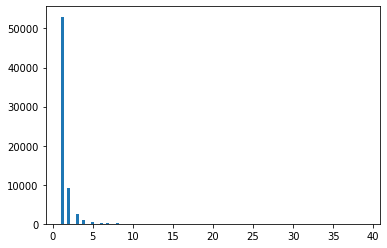

In [146]:
plt.hist(vt_targets.groupby("AuctionID").size(), bins=100)

In [152]:
vs_targets = extract_target_actions(watch, bid, dset_to_period["valid_for_sub"])

In [151]:
auction["SaishuppinKaisuu"].describe()

count    4.109559e+06
mean     4.207849e+01
std      1.107868e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.000000e+02
Name: SaishuppinKaisuu, dtype: float64

(54434, 16)


(array([5.4434e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.4000e+01, 2.9000e+01, 1.1000e+01,
        1.9000e+01, 9.0000e+00, 1.8000e+01, 6.0000e+00, 1.5000e+01,
        3.1000e+01, 1.2000e+01, 1.9000e+01, 1.2000e+01, 2.6000e+01,
        2.2000e+01, 3.4000e+01, 2.5000e+01, 2.2000e+01, 1.3000e+01,
        2.7000e+01, 1.9000e+01, 1.4000e+01, 3.3000e+01, 2.1000e+01,
        1.7000e+01, 2.8000e+01, 2.0000e+01, 1.5000e+01, 1.0000e+00,
        1.0000e+00, 4.6000e+01, 2.0000e+01, 4.7000e+01, 1.6000e+01,
        7.2000e+01, 2.6000e+01, 4.5000e+01, 1.4000e+01, 4.3000e+01,
        1.2000e+01, 1.9000e+01, 2.3000e+01, 4.0000e+01, 2.2000e+01,
        3.4000e+01, 7.7000e+01, 5.7000e+01, 6.1000e+01, 6.7000e+01,
        7.8000e+01, 6.0000e+01, 1.1300e+02, 8.6000e+01, 8.9000e+01,
        1.0500e+02, 1.0900e+02, 1.2300e+02, 1.4200e+02, 1.2000e+02,
        8.7000e+01, 3.5000e+01, 1.1600e+02, 1.9200e+02, 1.3800e+02,
        1.3900e+02, 1.3000e+02, 2.8600e+02, 8.30

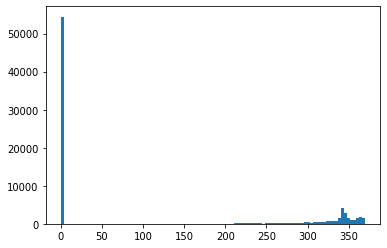

In [162]:
tr_targets = extract_target_actions(watch, bid, dset_to_period["train"])
print(tr_targets.merge(auction, on="AuctionID").query("SaishuppinKaisuu == 0").shape)
plt.hist(tr_targets.merge(auction, on="AuctionID")["SaishuppinKaisuu"],bins=100)

(48743, 16)


(array([4.8743e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.9000e+01, 4.9000e+01, 1.8000e+01,
        4.3000e+01, 7.0000e+00, 2.4000e+01, 2.0000e+01, 2.8000e+01,
        4.1000e+01, 1.9000e+01, 2.8000e+01, 2.9000e+01, 3.7000e+01,
        4.3000e+01, 4.2000e+01, 3.5000e+01, 3.5000e+01, 1.9000e+01,
        4.6000e+01, 2.5000e+01, 3.4000e+01, 3.7000e+01, 1.5000e+01,
        3.2000e+01, 3.4000e+01, 2.7000e+01, 2.2000e+01, 0.0000e+00,
        5.0000e+00, 6.8000e+01, 3.2000e+01, 5.4000e+01, 2.6000e+01,
        8.2000e+01, 3.4000e+01, 4.4000e+01, 2.5000e+01, 6.9000e+01,
        2.3000e+01, 2.6000e+01, 4.3000e+01, 4.7000e+01, 3.9000e+01,
        4.9000e+01, 7.8000e+01, 6.0000e+01, 9.6000e+01, 1.0000e+02,
        1.0500e+02, 8.6000e+01, 1.4400e+02, 1.4100e+02, 1.2100e+02,
        1.4000e+02, 1.7400e+02, 1.6300e+02, 1.8900e+02, 1.4800e+02,
        1.3300e+02, 6.1000e+01, 1.8900e+02, 2.3600e+02, 1.8700e+02,
        2.3000e+02, 1.6000e+02, 3.7400e+02, 1.24

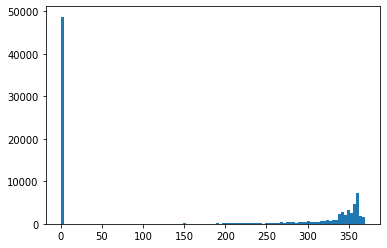

In [163]:
vs_targets = extract_target_actions(watch, bid, dset_to_period["valid_for_sub"])
print(vs_targets.merge(auction, on="AuctionID").query("SaishuppinKaisuu == 0").shape)
plt.hist(vs_targets.merge(auction, on="AuctionID")["SaishuppinKaisuu"], bins=100)

(54023, 16)


(array([5.4023e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 1.6000e+01, 2.3000e+01, 1.4000e+01,
        3.0000e+01, 6.0000e+00, 1.5000e+01, 9.0000e+00, 2.4000e+01,
        4.2000e+01, 1.6000e+01, 2.3000e+01, 2.2000e+01, 3.4000e+01,
        2.5000e+01, 3.2000e+01, 3.4000e+01, 2.5000e+01, 2.1000e+01,
        3.4000e+01, 1.8000e+01, 2.1000e+01, 3.0000e+01, 3.1000e+01,
        1.6000e+01, 2.9000e+01, 2.2000e+01, 8.0000e+00, 0.0000e+00,
        3.0000e+00, 5.0000e+01, 2.6000e+01, 5.0000e+01, 2.4000e+01,
        5.6000e+01, 2.1000e+01, 5.6000e+01, 1.8000e+01, 6.2000e+01,
        2.0000e+01, 3.0000e+01, 3.9000e+01, 5.8000e+01, 3.0000e+01,
        4.1000e+01, 6.6000e+01, 6.5000e+01, 9.8000e+01, 8.4000e+01,
        9.6000e+01, 6.6000e+01, 1.5200e+02, 1.0600e+02, 1.2500e+02,
        1.2400e+02, 1.5000e+02, 1.2400e+02, 1.5200e+02, 1.1500e+02,
        1.0500e+02, 5.2000e+01, 1.5200e+02, 2.1300e+02, 1.7600e+02,
        1.9600e+02, 1.6500e+02, 3.4100e+02, 1.00

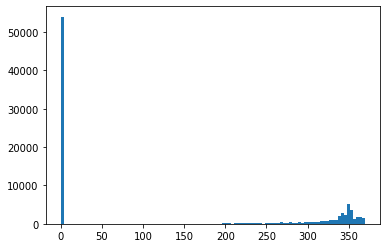

In [164]:
vt_targets = extract_target_actions(watch, bid, dset_to_period["valid_for_train"])
print(vt_targets.merge(auction, on="AuctionID").query("SaishuppinKaisuu == 0").shape)
plt.hist(vt_targets.merge(auction, on="AuctionID")["SaishuppinKaisuu"], bins=100)

## テストデータについて

- 予測対象ユーザーは6016

In [137]:
sample_sub = pd.read_csv(INPUT_DIR + "sample_submission.csv")

In [139]:
sample_sub[["KaiinID"]].nunique()

KaiinID    6016
dtype: int64

## どのオークションがシステム的に候補から外れるか

- 入札に含まれているオークションは落札とほぼ一致している

### 結論
- 落札に含まれているオークションは終了していると見なして除外する
- 他にもシステム的に候補に入っていないオークションが残っている可能性が高い(watchから確認できるかもしれない)

In [181]:
auction.shape

(4109559, 13)

In [187]:
print(rakusatsu.shape[0])
print(rakusatsu[["AuctionID"]].drop_duplicates().shape[0])

450242
450205


In [195]:
print(watchlist.shape[0])
print(watchlist[["AuctionID"]].drop_duplicates().shape[0])

4165155
1484732


In [196]:
print(shudounyuusatsu.shape[0])
print(shudounyuusatsu[["AuctionID"]].drop_duplicates().shape[0])

612516
453391


In [177]:
rakusatsu[["AuctionID"]].drop_duplicates().shape[0] == rakusatsu[["AuctionID"]].drop_duplicates().merge(auction, on="AuctionID").shape[0]

True

In [178]:
shudounyuusatsu[["AuctionID"]].drop_duplicates().shape[0] == shudounyuusatsu[["AuctionID"]].drop_duplicates().merge(auction, on="AuctionID").shape[0]

True

In [179]:
watchlist[["AuctionID"]].drop_duplicates().shape[0] == watchlist[["AuctionID"]].drop_duplicates().merge(auction, on="AuctionID").shape[0]

True

In [190]:
nyuusatsu_after_rakusatsu = (
    rakusatsu[["AuctionID", "RakusatsuDate"]]
    .drop_duplicates().merge(shudounyuusatsu, on="AuctionID")
    .query("RakusatsuDate <= ShudouNyuusatsuDate")
)

In [191]:
nyuusatsu_after_rakusatsu[["AuctionID"]].drop_duplicates().shape

(15418, 1)

In [197]:
rakusatsu[["AuctionID"]].drop_duplicates().merge(shudounyuusatsu[["AuctionID"]].drop_duplicates(), on="AuctionID").shape

(450138, 1)

In [193]:
watch_after_rakusatsu = (
    rakusatsu[["AuctionID", "RakusatsuDate"]]
    .drop_duplicates().merge(watchlist, on="AuctionID")
    .query("RakusatsuDate <= TourokuDate")
)

In [194]:
watch_after_rakusatsu[["AuctionID"]].drop_duplicates().shape

(5748, 1)

## お気に入りデータの削除フラグなどからオークション候補を作成できるか調べる

In [261]:
all_rmd_watch = watchlist[(watchlist["SakujoFlag"] == 1) &(watchlist["ActionDate"] < datetime.datetime(2019, 9, 1, 0, 0, 0))]

In [262]:
watch_rmd_cand = be.left_anti_join(all_rmd_watch, rakusatsu, "AuctionID", "AuctionID")

In [263]:
watch_rmd_cand["ActionYearMonth"] = extract_ym(watch_rmd_cand, "ActionDate")
print("お気に入り削除履歴から求めた、オークション候補から削除予定の候補数 : ", watch_rmd_cand.shape[0])
print(watch_rmd_cand["ActionYearMonth"].value_counts().sort_index())
print(watch_rmd_cand["ActionYearMonth"].value_counts().sort_index().cumsum() / watch_rmd_cand.shape[0])

お気に入り削除履歴から求めた、オークション候補から削除予定の候補数 :  2347344
201809    173589
201810    206741
201811    170127
201812    185630
201901    223522
201902    229411
201903    222482
201904    176467
201905    192880
201906    205883
201907    198045
201908    162567
Name: ActionYearMonth, dtype: int64
201809    0.073951
201810    0.162026
201811    0.234502
201812    0.313583
201901    0.408806
201902    0.506538
201903    0.601319
201904    0.676496
201905    0.758666
201906    0.846374
201907    0.930744
201908    1.000000
Name: ActionYearMonth, dtype: float64


In [284]:
print("謝って消去してしまう正解データ割合 : ", 
      1 - be.left_anti_join(target_auctions, watch_rmd_cand, "AuctionID", "AuctionID").shape[0] / target_auctions.shape[0])

謝って消去してしまう正解データ割合 :  0.19230657231880255


In [285]:
print("消去後のオークション候補件数 : ", be.left_anti_join(auc_cand, watch_rmd_cand, "AuctionID", "AuctionID").shape[0])

消去後のオークション候補件数 :  900229


In [401]:
100000 / (900229 * 6000)

1.8513807782982628e-05

## 中国人コードでどれくらいの正解データが残っているのか調べる

- 正解データの10%を130万件のデータでカバーしている状態

In [288]:
train_dataset = pd.read_pickle(IMD_DIR + "202001152052" + "_train_dataset.pkl")
valid_for_train_dataset = pd.read_pickle(IMD_DIR + "202001152052" + "_valid_for_train_dataset.pkl")
valid_for_sub_dataset = pd.read_pickle(IMD_DIR + "202001152055" + "_valid_for_sub_dataset.pkl")

In [294]:
dset_to_period = {
    "train": {"oldest": datetime.datetime(2019, 9, 3, 0, 0, 0),
              "newest": datetime.datetime(2019, 9, 10, 0, 0, 0)},
    "valid_for_train": {"oldest": datetime.datetime(2019, 9, 10, 0, 0, 0),
              "newest": datetime.datetime(2019, 9, 17, 0, 0, 0),},
    "valid_for_sub": {"oldest": datetime.datetime(2019, 9, 17, 0, 0, 0),
              "newest": datetime.datetime(2019, 9, 24, 0, 0, 0),}
}

In [391]:
def extract_target_aucs(watch, bid, dset_to_period, dset_type):

    oldest_dtime, newest_dtime = (
        dset_to_period[dset_type]["oldest"],
        dset_to_period[dset_type]["newest"]
    )    
    watch_actioned = (
        watch[(watch["ActionDate"] >= oldest_dtime) & (watch["ActionDate"] < newest_dtime)]
    )
    bid_actioned = (
        bid[(bid["ActionDate"] >= oldest_dtime) & (bid["ActionDate"] < newest_dtime)]
    )
    target_aucs = (
        pd.concat([watch_actioned, bid_actioned], sort=False)
    )
    return target_aucs

In [384]:
# 正解データのオークションをどのくらい含められているか
print(train_dataset.query("(watch_actioned == 1) | (bid_actioned == 1)")["AuctionID"].nunique() / \
     extract_target_aucs(watchlist, shudounyuusatsu, dset_to_period, "train")[["AuctionID"]].drop_duplicates().shape[0])

0.0948067148743767


In [398]:
# どのくらいの正解データを含んでいるか
print(train_dataset.query("(watch_actioned == 1) | (bid_actioned == 1)")[["AuctionID", "KaiinID"]].drop_duplicates().shape[0])
# 正解のペアの割合
print(train_dataset.query("(watch_actioned == 1) | (bid_actioned == 1)")[["AuctionID", "KaiinID"]].drop_duplicates().shape[0] / \
     train_dataset[["AuctionID", "KaiinID"]].drop_duplicates().shape[0])

6347
0.0019329047260997563
